[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

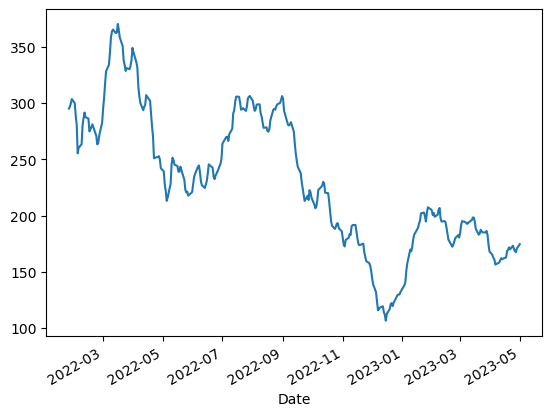

In [1]:
import yfinance as yf


stock = yf.download("TSLA","2022-01-01", "2023-05-22")

stock["Open"].rolling(window=30, center=True).apply(lambda x: x[-1]*0.5 + x[-2]*0.3 + x[-3]*0.2).plot()

In [9]:
import pandas as pd

# Read data from this url https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD
# and plot the time series of the number of cases per day

df = pd.read_csv("https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD")

In [6]:
# Do the normal checking (e.g., shape, data types)
df.head()
df.shape
df.types


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [12]:
# Use the pandas `to_datetime` function to create a new column that contains the complete date and time information of each shooting incident. Then set this column as the index of the dataframe. Then sort the incidents in chronological order (i.e., with the latest incidents at the bottom. Hint: check pandas method `sort_index`). Lastly, print the first and last few rows of the dataframe. 

df["date"] = pd.to_datetime(df["OCCUR_DATE"] + " " + df["OCCUR_TIME"])

df = df.sort_values(by="date")

df.head()



,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,date
24403,9953245,01/01/2006,02:00:00,BRONX,NaN,48,0.0,NaN,NONE,False,...,BLACK,<18,M,BLACK,1.013405e+06,251800.750000,40.857770,-73.894607,POINT (-73.89460745999997 40.85776982200008),2006-01-01 02:00:00
7704,9953252,01/01/2006,02:22:00,MANHATTAN,NaN,28,0.0,NaN,NONE,True,...,BLACK,25-44,M,BLACK,9.988158e+05,233545.437500,40.807700,-73.947386,POINT (-73.94738575999997 40.80770036400003),2006-01-01 02:22:00
20222,9953250,01/01/2006,02:34:00,QUEENS,NaN,114,0.0,NaN,BAR/NIGHT CLUB,True,...,BLACK,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,POINT (-73.93383258499995 40.77486094100004),2006-01-01 02:34:00
23889,9953250,01/01/2006,02:34:00,QUEENS,NaN,114,0.0,NaN,BAR/NIGHT CLUB,True,...,BLACK,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,POINT (-73.93383258499995 40.77486094100004),2006-01-01 02:34:00
13048,9953247,01/01/2006,03:30:00,BROOKLYN,NaN,67,0.0,NaN,NaN,False,...,UNKNOWN,18-24,M,BLACK,9.993160e+05,176460.000000,40.651014,-73.945707,POINT (-73.94570651699996 40.65101399800005),2006-01-01 03:30:00


In [13]:
# Create a new column in the dataframe that shows the incident's day of the week in abbreviated names (e.g., Mon, Tue). Print the first few rows of the dataframe to show the new column. 

df["day"] = df["date"].dt.day_name().str.slice(stop=3)

df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,date,day
24403,9953245,01/01/2006,02:00:00,BRONX,NaN,48,0.0,NaN,NONE,False,...,<18,M,BLACK,1.013405e+06,251800.750000,40.857770,-73.894607,POINT (-73.89460745999997 40.85776982200008),2006-01-01 02:00:00,Sun
7704,9953252,01/01/2006,02:22:00,MANHATTAN,NaN,28,0.0,NaN,NONE,True,...,25-44,M,BLACK,9.988158e+05,233545.437500,40.807700,-73.947386,POINT (-73.94738575999997 40.80770036400003),2006-01-01 02:22:00,Sun
20222,9953250,01/01/2006,02:34:00,QUEENS,NaN,114,0.0,NaN,BAR/NIGHT CLUB,True,...,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,POINT (-73.93383258499995 40.77486094100004),2006-01-01 02:34:00,Sun
23889,9953250,01/01/2006,02:34:00,QUEENS,NaN,114,0.0,NaN,BAR/NIGHT CLUB,True,...,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,POINT (-73.93383258499995 40.77486094100004),2006-01-01 02:34:00,Sun
13048,9953247,01/01/2006,03:30:00,BROOKLYN,NaN,67,0.0,NaN,NaN,False,...,18-24,M,BLACK,9.993160e+05,176460.000000,40.651014,-73.945707,POINT (-73.94570651699996 40.65101399800005),2006-01-01 03:30:00,Sun


In [21]:
# From the year 2016 to 2022 (both inclusive), what is the percentage of the shooting incidents that resulted in the victim’s death?

# Get only the number of true values 
data = df.query("date.dt.year >= 2016 and date.dt.year <= 2022")["STATISTICAL_MURDER_FLAG"].value_counts()[True]

print(str(data) + " décès entre 2016 et 2022")

1917 décès entre 2016 et 2022


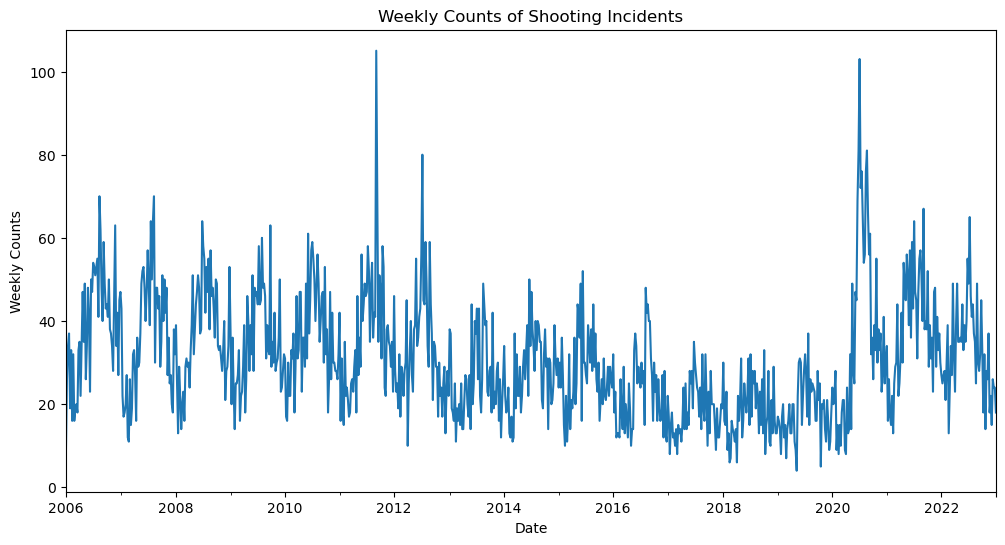

In [22]:
# Resample the data to show the *weekly* counts of the shooting incidents. Make a line plot that shows how the weekly counts  change over time. Choose a suitable aspect ratio for your plot. Include important elements (e.g., axis labels, title) and make the plot easy to read (e.g., larger fonts)

import matplotlib.pyplot as plt

weekly_counts = df.resample('W', on='date')['INCIDENT_KEY'].count()

plt.figure(figsize=(12, 6))
weekly_counts.plot(kind='line')

plt.xlabel('Date')
plt.ylabel('Weekly Counts')
plt.title('Weekly Counts of Shooting Incidents')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()